# Combining Health and County Climate Data and Exploring

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
climate_df = pd.read_csv('./data/01_climate_data/01_climate_data_CLEAN/combined_data_no_heatWave_1979_2011.zip', parse_dates=['month_year_short'])
diseases_df = 

In [6]:
climate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231956 entries, 0 to 1231955
Data columns (total 14 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1231956 non-null  int64         
 1   county_name            1231956 non-null  object        
 2   county_FIPS            1231956 non-null  float64       
 3   month_year_long        1231956 non-null  object        
 4   month_year_short       1231956 non-null  datetime64[ns]
 5   avg_dailyMaxAirTemp_F  1231956 non-null  float64       
 6   min_dailyMaxAirTemp_F  1231956 non-null  float64       
 7   max_dailyMaxAirTemp_F  1231956 non-null  float64       
 8   avg_daily_precip_mm    1231956 non-null  float64       
 9   min_daily_precip_mm    1231956 non-null  float64       
 10  max_daily_precip_mm    1231956 non-null  float64       
 11  avg_FPM                335988 non-null   float64       
 12  min_FPM                33598

In [20]:
temp = climate_df.drop(columns=['avg_FPM', 'min_FPM', 'max_FPM'])
temp

,Unnamed: 0,county_name,county_FIPS,month_year_long,month_year_short,avg_dailyMaxAirTemp_F,min_dailyMaxAirTemp_F,max_dailyMaxAirTemp_F,avg_daily_precip_mm,min_daily_precip_mm,max_daily_precip_mm
0,0,"Autauga County, AL",1001.0,"Jan, 1979",1979-01-01,48.44,29.9,67.1,5.59,0.0,52.6
1,1,"Autauga County, AL",1001.0,"Feb, 1979",1979-02-01,54.11,33.5,74.6,5.33,0.0,34.8
2,2,"Autauga County, AL",1001.0,"Mar, 1979",1979-03-01,65.65,47.4,78.1,5.72,0.0,124.0
3,3,"Autauga County, AL",1001.0,"Apr, 1979",1979-04-01,72.90,62.0,82.7,11.14,0.0,93.7
4,4,"Autauga County, AL",1001.0,"May, 1979",1979-05-01,78.77,66.3,84.5,3.45,0.0,27.2
...,...,...,...,...,...,...,...,...,...,...,...
1231951,1231951,"Weston County, WY",56045.0,"Aug, 2011",2011-08-01,88.68,69.0,99.4,1.03,0.0,32.9
1231952,1231952,"Weston County, WY",56045.0,"Sep, 2011",2011-09-01,76.75,45.0,94.0,0.56,0.0,16.3
1231953,1231953,"Weston County, WY",56045.0,"Oct, 2011",2011-10-01,61.91,33.2,88.7,0.89,0.0,16.3
1231954,1231954,"Weston County, WY",56045.0,"Nov, 2011",2011-11-01,42.87,17.5,60.0,0.36,0.0,12.1


<AxesSubplot:xlabel='month_year_short', ylabel='avg_daily_precip_mm'>

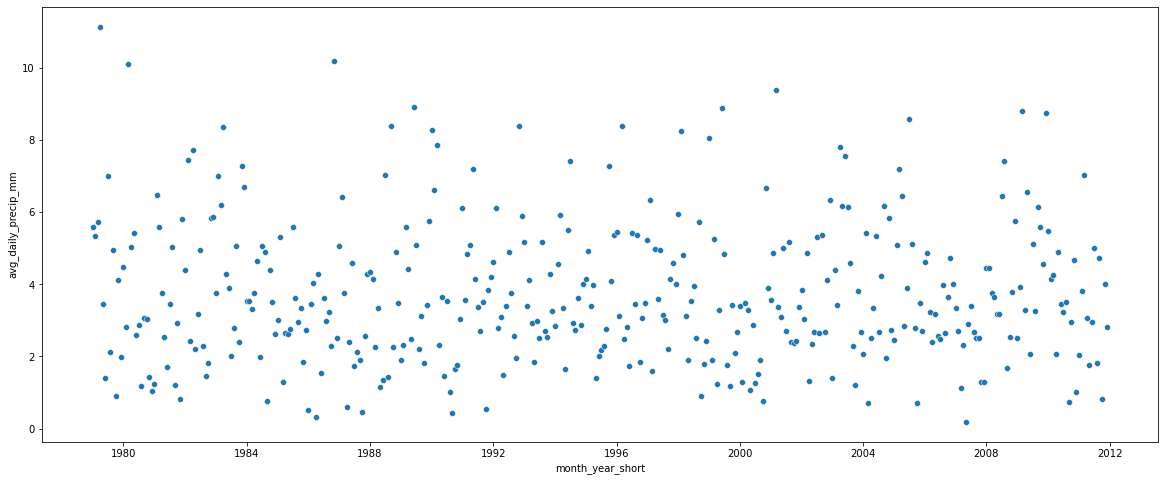

In [22]:
autaguaCounty_df = temp[temp['county_name'] == 'Autauga County, AL']
autaguaCounty_df


fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.scatterplot(data=autaguaCounty_df, x='month_year_short', y='avg_daily_precip_mm', ax=ax)

In [29]:
grouped_temp = temp.groupby(by=['county_name', 'month_year_short'])[['avg_dailyMaxAirTemp_F', 'avg_daily_precip_mm']].mean()
grouped_temp

avg_dailyMaxAirTemp_F  \
county_name          month_year_short                          
Abbeville County, SC 1979-01-01                        47.74   
                     1979-02-01                        50.14   
                     1979-03-01                        64.03   
                     1979-04-01                        70.49   
                     1979-05-01                        76.94   
...                                                      ...   
Ziebach County, SD   2011-08-01                        90.78   
                     2011-09-01                        78.49   
                     2011-10-01                        66.15   
                     2011-11-01                        46.33   
                     2011-12-01                        36.32   

                                       avg_daily_precip_mm  
county_name          month_year_short                       
Abbeville County, SC 1979-01-01                       5.20  
                     1979-02-01                       6.61  
                     1979-03-01                       2.76  
                     1979-04-01                       6.75  
                     1979-05-01                       5.21  
...                                                    ...  
Ziebach County, SD   2011-08-01                       1.67  
                     2011-09-01                       0.43  
                     2011-10-01                       0.76  
                     2011-11-01                       0.17  
                     2011-12-01                       0.12  

[1231956 rows x 2 columns]

In [32]:
#sns.scatterplot(data=grouped_temp, x='month_year_short', y='avg_dailyMaxAirTemp_F', hue='county_name')

In [ ]:
plt.plot()